# 1. Data Collection

Loading libraries and https://www.cryptodatadownload.com/ datasets onto the notebook

In [874]:
#Analysis
import pandas as pd
import numpy as np
import functools as ft
import math
#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')


#Models
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#Metrics evaluation 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
import warnings
warnings.filterwarnings('ignore') #ignore warnings

%matplotlib inline


In [875]:
df_btc = pd.read_csv('Binance_BTCUSDT_1h.csv')
df_eth = pd.read_csv('Binance_ETHUSDT_1h.csv')
df_ada = pd.read_csv('Binance_ADAUSDT_1h.csv')
df_bnb = pd.read_csv('Binance_BNBUSDT_1h.csv')
df_link = pd.read_csv('Binance_LINKUSDT_1h.csv')

# 2. Data Cleaning and merging

Importing libraries, removing unrequired columns, checking for missing and duplicate values, calculating the average of the OHLC (open, high, low, close) values and merging dataframes.

In [876]:
print(".head for datasets")
btc_head = df_btc.head()
print("BTC: {}".format(btc_head))
print("---------------------------------------")
eth_head = df_eth.head()
print("ETH: {}".format(eth_head))
print("---------------------------------------")
bnb_head = df_bnb.head()
print("BNB: {}".format(bnb_head))
print("---------------------------------------")
ada_head = df_ada.head()
print("ADA: {}".format(ada_head))
print("---------------------------------------")
link_head = df_link.head()
print("LINK: {}".format(link_head))

.head for datasets
BTC:                                                                                                                                       https://www.CryptoDataDownload.com
unix          date                symbol   open           high           low            close          Volume BTC   Volume USDT                               tradecount
1651276800000 2022-04-30 00:00:00 BTC/USDT 38596.11000000 38746.08000000 38563.06000000 38684.61000000 587.34197000 22700561.09758080                              12130
1651273200000 2022-04-29 23:00:00 BTC/USDT 38608.63000000 38665.36000000 38555.98000000 38596.11000000 668.17028000 25799985.70659220                              20057
1651269600000 2022-04-29 22:00:00 BTC/USDT 38560.14000000 38635.29000000 38430.03000000 38608.63000000 658.46652000 25381269.14568990                              25568
1651266000000 2022-04-29 21:00:00 BTC/USDT 38564.38000000 38649.99000000 38450.47000000 38560.15000000 795.69830000 30692269.686485

Something doesn't look right here, data is in columns but with only one column in the dataframe with others are index. .info() method might help us understand if that is indeed the case.

In [877]:
print(".info for datasets")
btc_info = df_btc.info()
print("BTC: {}".format(btc_info))
print("---------------------------------------")
eth_info = df_eth.info()
print("ETH: {}".format(eth_info))
print("---------------------------------------")
bnb_info = df_bnb.info()
print("BNB: {}".format(bnb_info))
print("---------------------------------------")
ada_info = df_ada.info()
print("ADA: {}".format(ada_info))
print("---------------------------------------")
link_info = df_link.info()
print("LINK: {}".format(link_info))

.info for datasets
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 41185 entries, ('unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC', 'Volume USDT') to ('1502942400.0', '2017-08-17 04-AM', 'BTC/USDT', '16199.91', '16199.91', '4261.32', '4308.83', '44.51', '190952.85')
Data columns (total 1 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   https://www.CryptoDataDownload.com  15249 non-null  object
dtypes: object(1)
memory usage: 4.0+ MB
BTC: None
---------------------------------------
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 41185 entries, ('unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume ETH', 'Volume USDT') to ('1502942400.0', '2017-08-17 04-AM', 'ETH/USDT', '652.74', '652.74', '298', '300.79', '122.52', '36736.84')
Data columns (total 1 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                       

BTC data has been imported with a single column of object, but we do see 41.2k rows with the relevant data columns. There are 9 columns that are set as an index for the tradecount data that is not really important for the model since we are attempting to just base the price of Chainlink (LINK) crypto on the price of the 4 feature crypto assets (BTC, ETH, BNB, ADA).

For this we will need to reset the index, rename the columns to what they are in the first row, drop unrequired columns, drop the first row since this would now be a duplicate of the column names. We will use a function to run through this quicker.

In [878]:
def clean_data(df):
    df.reset_index(inplace=True)
    
    df.drop(columns=['level_0', 'level_7', 'level_8', 'https://www.CryptoDataDownload.com'], axis=1,inplace=True)
    
    dict = {'level_1':'date',
        'level_2':'symbol',
        'level_3':'open',
        'level_4':'high',
        'level_5':'low',
        'level_6':'close'}
    df.rename(columns = dict, inplace = True)
    
    df.drop(df.index[0], inplace = True)

In [879]:
clean_data(df_btc)
clean_data(df_eth)
clean_data(df_bnb)
clean_data(df_ada)
clean_data(df_link)

Now that are datasets are a bit cleaner, we should check for null values as well as any duplicates that may be present in them before we start transforming data that would be usable for the model. We would only be able to check for missing values and duplicate values on the 'date' column on each dataset.

In [880]:
print("Sum of null values in datasets")
btc_is_null = df_btc.isnull().sum()
print("BTC: {}".format(df_btc.isnull().sum()))
print("---------------------------------------")
eth_is_null = df_eth.isnull().sum()
print("ETH: {}".format(df_eth.isnull().sum()))
print("---------------------------------------")
bnb_is_null = df_bnb.isnull().sum()
print("BNB: {}".format(df_bnb.isnull().sum()))
print("---------------------------------------")
ada_is_null = df_ada.isnull().sum()
print("ADA: {}".format(df_ada.isnull().sum()))
print("---------------------------------------")
link_is_null = df_link.isnull().sum()
print("LINK: {}".format(df_link.isnull().sum()))

Sum of null values in datasets
BTC: date      0
symbol    0
open      0
high      0
low       0
close     0
dtype: int64
---------------------------------------
ETH: date      0
symbol    0
open      0
high      0
low       0
close     0
dtype: int64
---------------------------------------
BNB: date      0
symbol    0
open      0
high      0
low       0
close     0
dtype: int64
---------------------------------------
ADA: date      0
symbol    0
open      0
high      0
low       0
close     0
dtype: int64
---------------------------------------
LINK: date      0
symbol    0
open      0
high      0
low       0
close     0
dtype: int64


In [881]:
print("Count for Duplicate values in datasets")
print("---------------------------------------")
df_btc_duplicate_values = df_btc['date'].value_counts(ascending = True)
print("BTC: {}".format(df_btc['date'].value_counts(ascending = True)))
print("---------------------------------------")
df_eth_duplicate_values = df_eth['date'].value_counts(ascending = True)
print("ETH: {}".format(df_eth['date'].value_counts(ascending = True)))
print("---------------------------------------")
df_bnb_duplicate_values = df_bnb['date'].value_counts(ascending = True)
print("BNB: {}".format(df_bnb['date'].value_counts(ascending = True)))
print("---------------------------------------")
df_ada_duplicate_values = df_ada['date'].value_counts(ascending = True)
print("ADA: {}".format(df_ada['date'].value_counts(ascending = True)))
print("---------------------------------------")
df_link_duplicate_values = df_link['date'].value_counts(ascending = True)
print("LINK: {}".format(df_link['date'].value_counts(ascending = True)))


Count for Duplicate values in datasets
---------------------------------------
BTC: 2021-05-06 16:00:00    1
2019-12-05 04-PM       1
2021-01-21 07:00:00    1
2019-05-18 06-AM       1
2021-05-06 22:00:00    1
                      ..
2018-03-24 11-PM       1
2018-09-04 09-AM       1
2022-03-03 03:00:00    1
2021-11-07 10:00:00    1
2021-08-14 13:00:00    1
Name: date, Length: 41184, dtype: int64
---------------------------------------
ETH: 2021-05-06 16:00:00    1
2019-12-05 04-PM       1
2021-01-21 07:00:00    1
2019-05-18 06-AM       1
2021-05-06 22:00:00    1
                      ..
2018-03-24 11-PM       1
2018-09-04 09-AM       1
2022-03-03 03:00:00    1
2021-11-07 10:00:00    1
2021-08-14 13:00:00    1
Name: date, Length: 41184, dtype: int64
---------------------------------------
BNB: 2021-05-06 16:00:00    1
2022-02-19 08:00:00    1
2020-09-28 11:00:00    1
2020-09-11 17:00:00    1
2021-10-24 18:00:00    1
                      ..
2022-04-22 15:00:00    1
2021-02-28 10:00:00  

So we don't have any missing or duplicate values across the three datasets, time to check the .head() for the datasets

In [882]:
print(".head for datasets")
btc_head = df_btc.head()
print("BTC: {}".format(btc_head))
print("---------------------------------------")
eth_head = df_eth.head()
print("ETH: {}".format(eth_head))
print("---------------------------------------")
bnb_head = df_bnb.head()
print("BNB: {}".format(bnb_head))
print("---------------------------------------")
ada_head = df_ada.head()
print("ADA: {}".format(ada_head))
print("---------------------------------------")
link_head = df_link.head()
print("LINK: {}".format(link_head))

.head for datasets
BTC:                   date    symbol            open            high  \
1  2022-04-30 00:00:00  BTC/USDT  38596.11000000  38746.08000000   
2  2022-04-29 23:00:00  BTC/USDT  38608.63000000  38665.36000000   
3  2022-04-29 22:00:00  BTC/USDT  38560.14000000  38635.29000000   
4  2022-04-29 21:00:00  BTC/USDT  38564.38000000  38649.99000000   
5  2022-04-29 20:00:00  BTC/USDT  38331.55000000  38584.00000000   

              low           close  
1  38563.06000000  38684.61000000  
2  38555.98000000  38596.11000000  
3  38430.03000000  38608.63000000  
4  38450.47000000  38560.15000000  
5  38310.90000000  38564.44000000  
---------------------------------------
ETH:                   date    symbol           open           high            low  \
1  2022-04-30 00:00:00  ETH/USDT  2817.13000000  2829.65000000  2812.19000000   
2  2022-04-29 23:00:00  ETH/USDT  2819.26000000  2823.17000000  2809.08000000   
3  2022-04-29 22:00:00  ETH/USDT  2807.81000000  2823.00000000 

Now, we check for what the Dtypes we have across the datasets.

In [883]:
print(".info for datasets")
btc_info = df_btc.info()
print("BTC: {}".format(btc_info))
print("---------------------------------------")
eth_info = df_eth.info()
print("ETH: {}".format(eth_info))
print("---------------------------------------")
bnb_info = df_bnb.info()
print("BNB: {}".format(bnb_info))
print("---------------------------------------")
ada_info = df_ada.info()
print("ADA: {}".format(ada_info))
print("---------------------------------------")
link_info = df_link.info()
print("LINK: {}".format(link_info))

.info for datasets
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41184 entries, 1 to 41184
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    41184 non-null  object
 1   symbol  41184 non-null  object
 2   open    41184 non-null  object
 3   high    41184 non-null  object
 4   low     41184 non-null  object
 5   close   41184 non-null  object
dtypes: object(6)
memory usage: 2.2+ MB
BTC: None
---------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41184 entries, 1 to 41184
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    41184 non-null  object
 1   symbol  41184 non-null  object
 2   open    41184 non-null  object
 3   high    41184 non-null  object
 4   low     41184 non-null  object
 5   close   41184 non-null  object
dtypes: object(6)
memory usage: 2.2+ MB
ETH: None
---------------------------------------
<class 'p

We can see that df_btc and df_eth have 41,184 rows of data but the other three have 15,248 rows of data. It would be good to see the tail end of the dataframes to understand where they cut off.

In [884]:
print(".tail for datasets")
btc_tail = df_btc.tail()
print("BTC: {}".format(btc_tail))
print("---------------------------------------")
eth_tail = df_eth.tail()
print("ETH: {}".format(eth_tail))
print("---------------------------------------")
bnb_tail = df_bnb.tail()
print("BNB: {}".format(bnb_tail))
print("---------------------------------------")
ada_tail = df_ada.tail()
print("ADA: {}".format(ada_tail))
print("---------------------------------------")
link_tail = df_link.tail()
print("LINK: {}".format(link_tail))

.tail for datasets
BTC:                    date    symbol      open      high      low    close
41180  2017-08-17 08-AM  BTC/USDT   4349.99   4377.85  4333.32  4360.69
41181  2017-08-17 07-AM  BTC/USDT   4324.35   4349.99  4287.41  4349.99
41182  2017-08-17 06-AM  BTC/USDT   4315.32   4345.45  4309.37  4324.35
41183  2017-08-17 05-AM  BTC/USDT   4308.83   4328.69  4291.37  4315.32
41184  2017-08-17 04-AM  BTC/USDT  16199.91  16199.91  4261.32  4308.83
---------------------------------------
ETH:                    date    symbol    open    high    low   close
41180  2017-08-17 08-AM  ETH/USDT  307.96  309.97    307  308.62
41181  2017-08-17 07-AM  ETH/USDT  302.68  307.96  302.6  307.96
41182  2017-08-17 06-AM  ETH/USDT   303.1  304.44  301.9  302.68
41183  2017-08-17 05-AM  ETH/USDT  301.61  303.28    300   303.1
41184  2017-08-17 04-AM  ETH/USDT  652.74  652.74    298  300.79
---------------------------------------
BNB:                       date    symbol         open         high  

So the df_bnb, df_ada and df_link datasets were cut off at the 2020-08-01 23:00:00 timestamp. When we do merge the datasets, those would be last datetime value where we would be merging them.

Additionally, we can see that the column names are same across the 5 datasets that we have, all columns are objects which we will need to change to merge later on. We will also require one value for the open, high, low, close data and we will average it out.

In [885]:
def get_to_average_OHLC(df):
    df['date']= pd.to_datetime(df['date'], errors='coerce')
    df[['open','high','low','close']]=df[['open','high','low','close']].astype(float)
    df['average'] = (df[['open','high', 'low', 'close']]).mean(axis=1)
    df.drop(columns=['symbol', 'open', 'high', 'low', 'close'], axis=1,inplace=True)

In [886]:
get_to_average_OHLC(df_btc)
get_to_average_OHLC(df_eth)
get_to_average_OHLC(df_bnb)
get_to_average_OHLC(df_ada)
get_to_average_OHLC(df_link)

In [887]:
print(".head for datasets")
btc_head = df_btc.head()
print("BTC: {}".format(btc_head))
print("---------------------------------------")
eth_head = df_eth.head()
print("ETH: {}".format(eth_head))
print("---------------------------------------")
bnb_head = df_bnb.head()
print("BNB: {}".format(bnb_head))
print("---------------------------------------")
ada_head = df_ada.head()
print("ADA: {}".format(ada_head))
print("---------------------------------------")
link_head = df_link.head()
print("LINK: {}".format(link_head))

.head for datasets
BTC:                  date     average
1 2022-04-30 00:00:00  38647.4650
2 2022-04-29 23:00:00  38606.5200
3 2022-04-29 22:00:00  38558.5225
4 2022-04-29 21:00:00  38556.2475
5 2022-04-29 20:00:00  38447.7225
---------------------------------------
ETH:                  date    average
1 2022-04-30 00:00:00  2820.8750
2 2022-04-29 23:00:00  2817.1600
3 2022-04-29 22:00:00  2811.3800
4 2022-04-29 21:00:00  2808.6200
5 2022-04-29 20:00:00  2801.0725
---------------------------------------
BNB:                  date  average
1 2022-04-30 00:00:00  393.550
2 2022-04-29 23:00:00  393.125
3 2022-04-29 22:00:00  392.475
4 2022-04-29 21:00:00  392.825
5 2022-04-29 20:00:00  392.575
---------------------------------------
ADA:                  date   average
1 2022-04-30 00:00:00  0.807400
2 2022-04-29 23:00:00  0.806725
3 2022-04-29 22:00:00  0.805225
4 2022-04-29 21:00:00  0.804125
5 2022-04-29 20:00:00  0.800000
---------------------------------------
LINK:                

In [888]:
print(".info for datasets")
btc_info = df_btc.info()
print("BTC: {}".format(btc_info))
print("---------------------------------------")
eth_info = df_eth.info()
print("ETH: {}".format(eth_info))
print("---------------------------------------")
bnb_info = df_bnb.info()
print("BNB: {}".format(bnb_info))
print("---------------------------------------")
ada_info = df_ada.info()
print("ADA: {}".format(ada_info))
print("---------------------------------------")
link_info = df_link.info()
print("LINK: {}".format(link_info))

.info for datasets
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41184 entries, 1 to 41184
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     15248 non-null  datetime64[ns]
 1   average  41184 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 965.2 KB
BTC: None
---------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41184 entries, 1 to 41184
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     15248 non-null  datetime64[ns]
 1   average  41184 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 965.2 KB
ETH: None
---------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15248 entries, 1 to 15248
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  

We can see that not all 'date' rows converted to datetime64[ns] object for df_btc and df_eth.

15,248 rows down seem to be when the datasource changed the format for its 'date' column. We would have to drop these rows in anycase since model would require all values to be present.

In [889]:
df_btc = df_btc[~df_btc.date.isnull()]
df_eth = df_eth[~df_eth.date.isnull()]

Now we use the .info method to see what the df_btc and df_eth datasets look like before we merge them on the datetime.

In [890]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15248 entries, 1 to 15248
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     15248 non-null  datetime64[ns]
 1   average  15248 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 357.4 KB


In [891]:
df_eth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15248 entries, 1 to 15248
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     15248 non-null  datetime64[ns]
 1   average  15248 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 357.4 KB


Now we rename the column names and merge the 5 datasets together.

In [892]:
df_btc.rename(columns = {'average':'average_btc'}, inplace = True)
df_eth.rename(columns = {'average':'average_eth'}, inplace = True)
df_bnb.rename(columns = {'average':'average_bnb'}, inplace = True)
df_ada.rename(columns = {'average':'average_ada'}, inplace = True)
df_link.rename(columns = {'average':'average_link'}, inplace = True)

In [893]:
dfs = [df_btc, df_eth, df_bnb, df_ada, df_link]
df = ft.reduce(lambda left, right: pd.merge(left, right, on='date'), dfs)

df

,date,average_btc,average_eth,average_bnb,average_ada,average_link
0,2022-04-30 00:00:00,38647.4650,2820.8750,393.550000,0.807400,12.015000
1,2022-04-29 23:00:00,38606.5200,2817.1600,393.125000,0.806725,11.960000
2,2022-04-29 22:00:00,38558.5225,2811.3800,392.475000,0.805225,11.935000
3,2022-04-29 21:00:00,38556.2475,2808.6200,392.825000,0.804125,11.960000
4,2022-04-29 20:00:00,38447.7225,2801.0725,392.575000,0.800000,11.955000
...,...,...,...,...,...,...
15243,2020-08-02 03:00:00,11949.6000,401.9000,21.953325,0.146095,8.336425
15244,2020-08-02 02:00:00,11932.2525,397.6775,21.871650,0.144070,8.295825
15245,2020-08-02 01:00:00,11859.9650,393.5975,21.764325,0.144205,8.302975
15246,2020-08-02 00:00:00,11795.2000,388.1700,21.583350,0.144375,8.322300


In [894]:
df.head()

,date,average_btc,average_eth,average_bnb,average_ada,average_link
0,2022-04-30 00:00:00,38647.4650,2820.8750,393.550,0.807400,12.015
1,2022-04-29 23:00:00,38606.5200,2817.1600,393.125,0.806725,11.960
2,2022-04-29 22:00:00,38558.5225,2811.3800,392.475,0.805225,11.935
3,2022-04-29 21:00:00,38556.2475,2808.6200,392.825,0.804125,11.960
4,2022-04-29 20:00:00,38447.7225,2801.0725,392.575,0.800000,11.955


# 3. Exploratory Data Analysis

We first take a look at the 5 different cryptocurrency prices by charting them separately on line plot with date on the x-axis and price on the y-axis. We use the .desrcibe method to get a statistical idea of the prices. 

Text(0, 0.5, 'BTC')

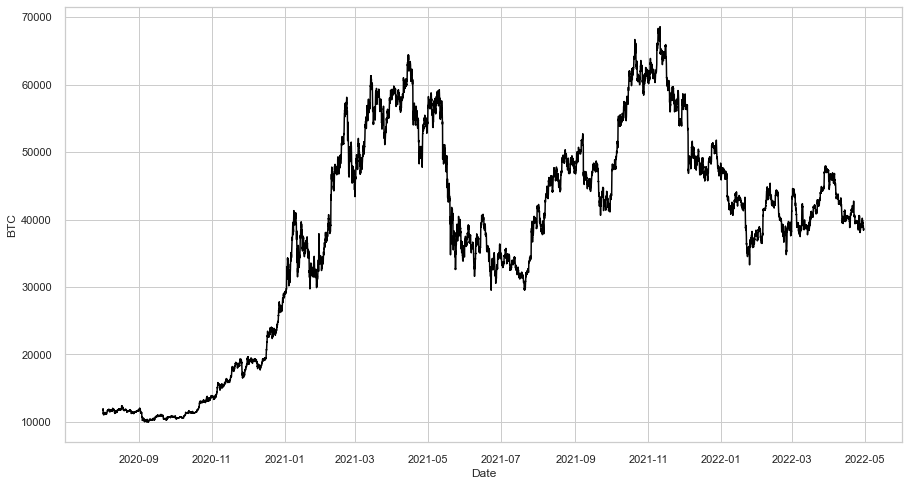

In [895]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("whitegrid")
sns.lineplot(data=df_btc, x='date', y='average_btc', color='black', linewidth=1.5)
plt.xlabel("Date")
plt.ylabel("BTC")

In [896]:
df_btc.describe()

,average_btc
count,15248.000000
mean,38378.597590
std,15682.814472
min,9977.847500
25%,31428.711875
50%,40691.450000
75%,48995.113125
max,68596.272500


Text(0, 0.5, 'ETH')

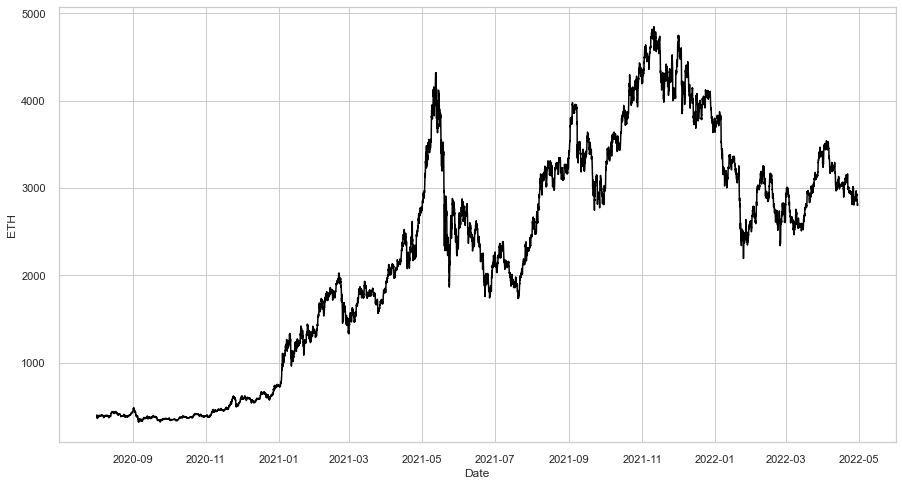

In [897]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("whitegrid")
sns.lineplot(data=df_eth, x='date', y='average_eth', color='black', linewidth=1.5)
plt.xlabel("Date")
plt.ylabel("ETH")

In [898]:
df_eth.describe()

,average_eth
count,15248.000000
mean,2254.666384
std,1287.243601
min,320.847500
25%,1092.388125
50%,2425.016250
75%,3230.767500
max,4847.755000


Text(0, 0.5, 'BNB')

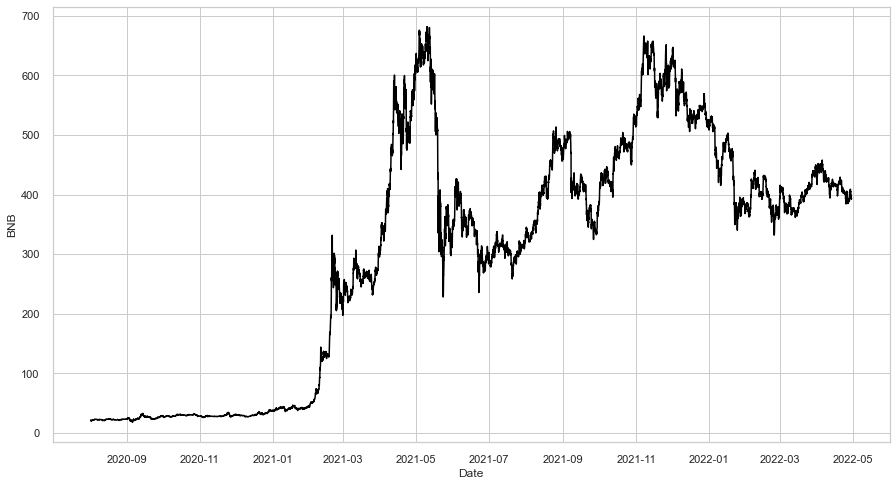

In [899]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("whitegrid")
sns.lineplot(data=df_bnb, x='date', y='average_bnb', color='black', linewidth=1.5)
plt.xlabel("Date")
plt.ylabel("BNB")

In [900]:
df_bnb.describe()

,average_bnb
count,15248.000000
mean,300.600174
std,200.889018
min,18.472800
25%,39.995900
50%,353.022500
75%,443.013113
max,681.405000


Text(0, 0.5, 'ADA')

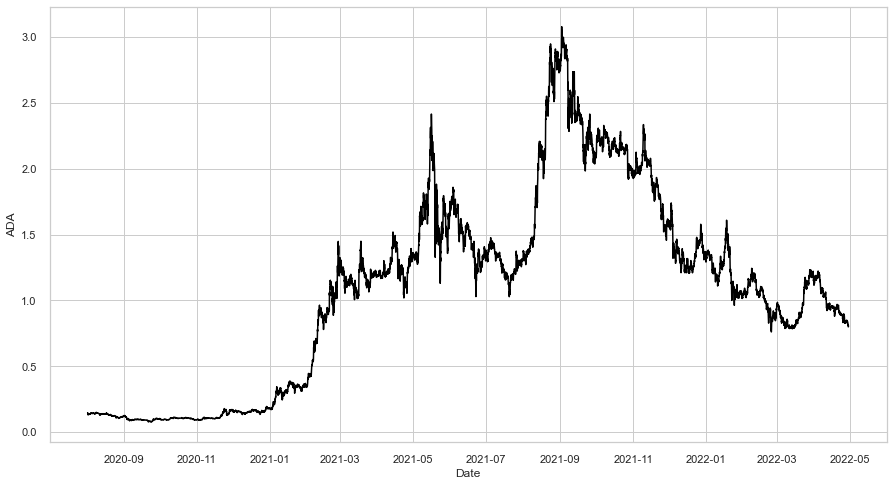

In [901]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("whitegrid")
sns.lineplot(data=df_ada, x='date', y='average_ada', color='black', linewidth=1.5)
plt.xlabel("Date")
plt.ylabel("ADA")

In [902]:
df_ada.describe()

,average_ada
count,15248.000000
mean,1.083721
std,0.738023
min,0.076590
25%,0.283774
50%,1.163600
75%,1.469281
max,3.079000


Text(0, 0.5, 'LINK')

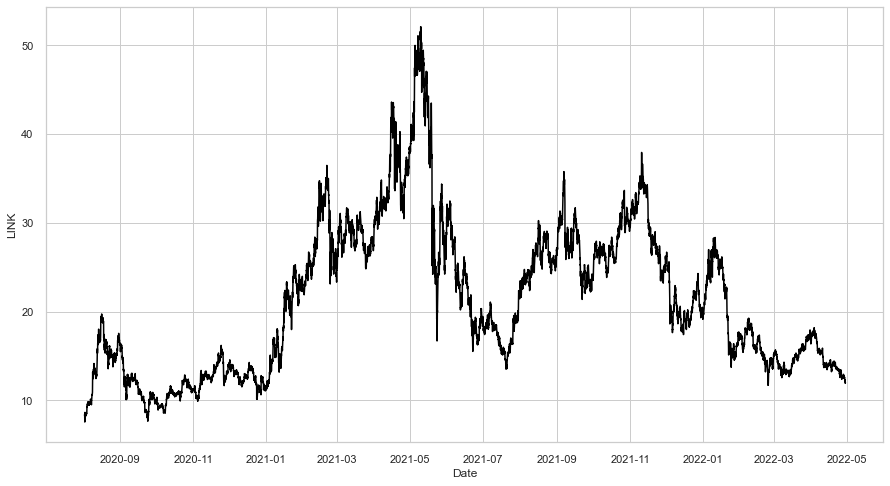

In [903]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("whitegrid")
sns.lineplot(data=df_link, x='date', y='average_link', color='black', linewidth=1.5)
plt.xlabel("Date")
plt.ylabel("LINK")

In [904]:
df_link.describe()

,average_link
count,15248.000000
mean,21.331485
std,8.439795
min,7.556950
25%,14.040844
50%,19.791250
75%,27.220169
max,52.102250


Now we plot them together so that we can get a visual on the price disparity between the different prices.

In [905]:
cols=df[['average_btc','average_eth','average_bnb','average_ada','average_link']]

In [906]:
dfm = pd.melt(df, id_vars=['date'], value_name='Prices', var_name='crypto')
dfm['crypto'].value_counts()

average_bnb     15248
average_eth     15248
average_link    15248
average_ada     15248
average_btc     15248
Name: crypto, dtype: int64

Text(0, 0.5, 'Prices')

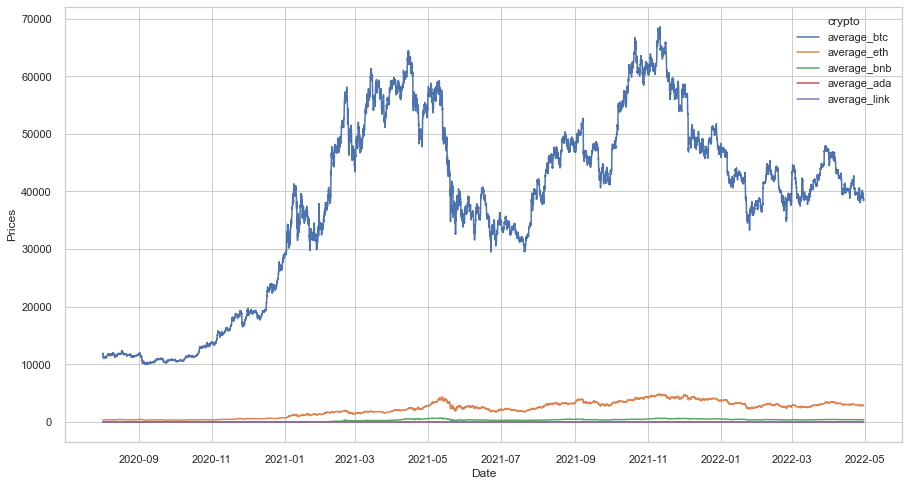

In [907]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.set_style("whitegrid")
sns.lineplot(data=dfm, x='date', y='Prices', hue='crypto', linewidth=1.5, scaley=True)
plt.xlabel("Date")
plt.ylabel("Prices")

Now we look at the correlation between the different cryptocurrencies.

In [908]:
df.corr(method ='pearson')

,average_btc,average_eth,average_bnb,average_ada,average_link
average_btc,1.000000,0.835970,0.837647,0.783463,0.778326
average_eth,0.835970,1.000000,0.948491,0.846759,0.577880
average_bnb,0.837647,0.948491,1.000000,0.820748,0.639159
average_ada,0.783463,0.846759,0.820748,1.000000,0.688690
average_link,0.778326,0.577880,0.639159,0.688690,1.000000


'average_link' is positively correlated to all the other cryptocurrencies in the dataset, with it having the greatest correlation to 'average_btc').

# 4. Data Preparation and Model Training

In this section we would split 'df' into feature and target variables, train and test data, then fit the models to the train and test dataframes and finally predict using those models as well as gauge them against regression metrics.

1. Linear Regression Model

We will be using Multiple Linear Regression as the first model. For this we, split the feature and target variables and then split the dataset into training and test data. Finally, we fit the model to the training data.

In [909]:
X = df[['average_btc','average_eth','average_bnb','average_ada']]
y = df['average_link']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size = 0.3, random_state=42)

reg_all = LinearRegression()

reg_all.fit(X_train_reg, y_train_reg)

LinearRegression()

Now, we use the model to get the training and test data target variable.

In [910]:
train_predict_reg = reg_all.predict(X_train_reg)
test_predict_reg = reg_all.predict(X_test_reg)

Finally, we measure the training and test data using regression accuracy metrics.

In [911]:
import math
print("Regression Metrics - Multiple Linear Regression Model")
print("-------------------------------------------------------------------------------------")
print("R^2 Train Data: {}".format(reg_all.score(X_train_reg, y_train_reg)))
print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train_reg,train_predict_reg)))
print("Train data MSE: ", mean_squared_error(y_train_reg,train_predict_reg))
print("Train data MAE: ", mean_absolute_error(y_train_reg,train_predict_reg))
print("-------------------------------------------------------------------------------------")
print("R^2 Test Data: {}".format(reg_all.score(X_test_reg, y_test_reg)))
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test_reg,test_predict_reg)))
print("Test data MSE: ", mean_squared_error(y_test_reg,test_predict_reg))
print("Test data MAE: ", mean_absolute_error(y_test_reg,test_predict_reg))

Regression Metrics - Multiple Linear Regression Model
-------------------------------------------------------------------------------------
R^2 Train Data: 0.7083048265880518
Train data RMSE:  4.561959328952676
Train data MSE:  20.811472919018346
Train data MAE:  3.397766261472404
-------------------------------------------------------------------------------------
R^2 Test Data: 0.6922208998567451
Test data RMSE:  4.669923356254033
Test data MSE:  21.808184153286934
Test data MAE:  3.471036976632596


2. Support Vector Regression

Support Vector Regression is the second model that we will be fitting to the data. This model requires transforming the data before we fit it. We will be transforming the data using minmax scaler before fitting it to the model.

In [912]:
scaler = MinMaxScaler()

y1_svr_train = y_train_reg.values.reshape(-1,1)
y1_svr_test = y_test_reg.values.reshape(-1,1)

scaled_X1_svr_train = scaler.fit_transform(X_train_reg)
scaled_X1_svr_test = scaler.fit_transform(X_test_reg)
scaled_y1_svr_train = scaler.fit_transform(y1_svr_train.reshape(-1,1))
scaled_y1_svr_test = scaler.fit_transform(y1_svr_test.reshape(-1,1))

sv_regressor = SVR(kernel = 'rbf')
sv_regressor.fit(scaled_X1_svr_train, scaled_y1_svr_train)

SVR()

Now we fit the training and test data to the generate predictions.

In [913]:
train_predict_svr=sv_regressor.predict(scaled_X1_svr_train)
test_predict_svr=sv_regressor.predict(scaled_X1_svr_test)

print("Train data prediction:", train_predict_svr.shape)
print("Test data prediction:", test_predict_svr.shape)

Train data prediction: (10673,)
Test data prediction: (4575,)


In [914]:
train_predict_svr = train_predict_svr.reshape(-1,1)
test_predict_svr = test_predict_svr.reshape(-1,1)

In [915]:
train_predict_svr = scaler.inverse_transform(train_predict_svr)
test_predict_svr = scaler.inverse_transform(test_predict_svr)
original_ytrain_svr = scaler.inverse_transform(scaled_y1_svr_train.reshape(-1,1)) 
original_ytest_svr = scaler.inverse_transform(scaled_y1_svr_test.reshape(-1,1))

Finally, we measure the model against the metrics to see how it compares to the baseline model of Multiple Linear Regression.

In [916]:
print("Regression Metrics - Support Vector Regression")
print("-------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain_svr, train_predict_svr))
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_svr,train_predict_svr)))
print("Train data MSE: ", mean_squared_error(original_ytrain_svr,train_predict_svr))
print("Train data MAE: ", mean_absolute_error(original_ytrain_svr,train_predict_svr))
print("-------------------------------------------------------------------------------------")
print("Test data R2 score:", r2_score(original_ytest_svr, test_predict_svr))
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_svr,test_predict_svr)))
print("Test data MSE: ", mean_squared_error(original_ytest_svr,test_predict_svr))
print("Test data MAE: ", mean_absolute_error(original_ytest_svr,test_predict_svr))

Regression Metrics - Support Vector Regression
-------------------------------------------------------------------------------------
Train data R2 score: 0.8962653093034625
Train data RMSE:  2.6964606806881726
Train data MSE:  7.270900202497322
Train data MAE:  2.359272970689157
-------------------------------------------------------------------------------------
Test data R2 score: 0.8888386165812004
Test data RMSE:  2.8065136679377947
Test data MSE:  7.876518968321654
Test data MAE:  2.4405181466661667


3. AdaBoost Regressor 

We call the Adaboost Regressor and fit it to the training data.

In [917]:
ab_regr = AdaBoostRegressor(random_state=43, n_estimators=100)
ab_regr.fit(X_train_reg, y_train_reg)

AdaBoostRegressor(n_estimators=100, random_state=43)

Now we use it to the predict the training as well as test data.

In [918]:
train_predict_abr=ab_regr.predict(X_train_reg)
test_predict_abr=ab_regr.predict(X_test_reg)

print("Train data prediction:", train_predict_abr.shape)
print("Test data prediction:", test_predict_abr.shape)

Train data prediction: (10673,)
Test data prediction: (4575,)


In [919]:
print("Regression Metrics - AdaBoost Regressor")
print("-------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(y_train_reg,train_predict_abr))
print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train_reg,train_predict_abr)))
print("Train data MSE: ", mean_squared_error(y_train_reg,train_predict_abr))
print("Train data MAE: ", mean_absolute_error(y_train_reg,train_predict_abr))
print("-------------------------------------------------------------------------------------")
print("Test data R2 score:", r2_score(y_test_reg,test_predict_abr))
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test_reg,test_predict_abr)))
print("Test data MSE: ", mean_squared_error(y_test_reg,test_predict_abr))
print("Test data MAE: ", mean_absolute_error(y_test_reg,test_predict_abr))
print("-------------------------------------------------------------------------------------")

Regression Metrics - AdaBoost Regressor
-------------------------------------------------------------------------------------
Train data R2 score: 0.8567404784911639
Train data RMSE:  3.1970434282897506
Train data MSE:  10.221086682370682
Train data MAE:  2.7817376412253125
-------------------------------------------------------------------------------------
Test data R2 score: 0.8520649539394343
Test data RMSE:  3.237618893375428
Test data MSE:  10.482176098741533
Test data MAE:  2.8130063011107898
-------------------------------------------------------------------------------------


# 5. Insights

Here we develop insights from the different predictive models. Plot the predicted values against the true values in the test data and carry over the regression metrics from the previous section to develop insights.

1. Multiple Linear Regression

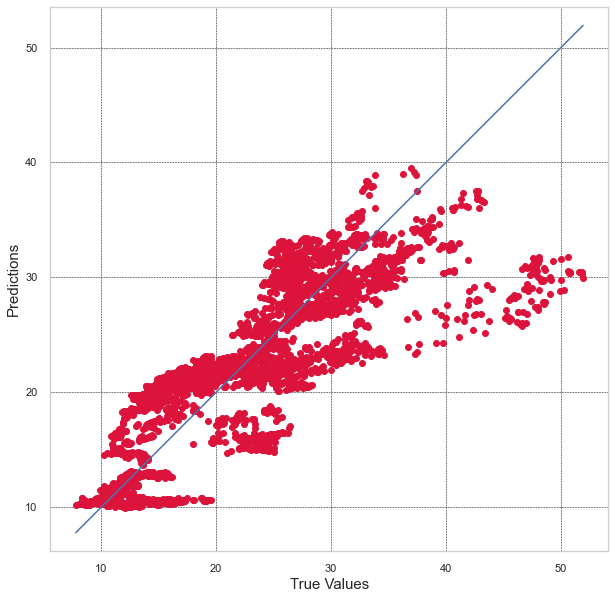

In [920]:
plt.figure(figsize=(10,10))
plt.scatter(y_test_reg,test_predict_reg, c='crimson')
p1 = max(max(test_predict_reg), max(y_test_reg))
p2 = min(min(test_predict_reg), min(y_test_reg))
plt.plot([p1, p2], [p1, p2], 'b-',alpha=1)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
ax = plt.axes()
ax.patch.set_facecolor('white')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.axis('equal')
plt.show()

In [921]:
print("Regression Metrics - Multiple Linear Regression Model")
print("-------------------------------------------------------------------------------------")
print("R^2 Train Data: {}".format(reg_all.score(X_train_reg, y_train_reg)))
print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train_reg,train_predict_reg)))
print("Train data MSE: ", mean_squared_error(y_train_reg,train_predict_reg))
print("Train data MAE: ", mean_absolute_error(y_train_reg,train_predict_reg))
print("-------------------------------------------------------------------------------------")
print("R^2 Test Data: {}".format(reg_all.score(X_test_reg, y_test_reg)))
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test_reg,test_predict_reg)))
print("Test data MSE: ", mean_squared_error(y_test_reg,test_predict_reg))
print("Test data MAE: ", mean_absolute_error(y_test_reg,test_predict_reg))

Regression Metrics - Multiple Linear Regression Model
-------------------------------------------------------------------------------------
R^2 Train Data: 0.7083048265880518
Train data RMSE:  4.561959328952676
Train data MSE:  20.811472919018346
Train data MAE:  3.397766261472404
-------------------------------------------------------------------------------------
R^2 Test Data: 0.6922208998567451
Test data RMSE:  4.669923356254033
Test data MSE:  21.808184153286934
Test data MAE:  3.471036976632596


The multiple linear regression model acts as a baseline, explaining about 70% of the variance in LINK overall. Despite a small RMSE of about 4.7, it is the worst performing model. It expectedly fails to capture the complex data generating process lying beneath the price mechanism.

2. Support Vector Regression

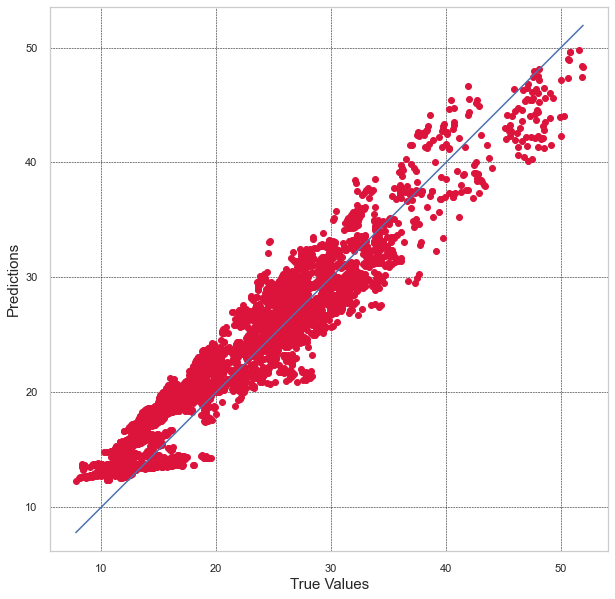

In [922]:
plt.figure(figsize=(10,10))
plt.scatter(original_ytest_svr, test_predict_svr, c='crimson')
p1 = max(max(test_predict_svr), max(original_ytest_svr))
p2 = min(min(test_predict_svr), min(original_ytest_svr))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
ax = plt.axes()
ax.patch.set_facecolor('white')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.axis('equal')
plt.show()

In [923]:
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_svr,train_predict_svr)))
print("Train data MSE: ", mean_squared_error(original_ytrain_svr,train_predict_svr))
print("Train data MAE: ", mean_absolute_error(original_ytrain_svr,train_predict_svr))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_svr,test_predict_svr)))
print("Test data MSE: ", mean_squared_error(original_ytest_svr,test_predict_svr))
print("Test data MAE: ", mean_absolute_error(original_ytest_svr,test_predict_svr))
print("-------------------------------------------------------------------------------------")
print("Train data explained variance regression score:", explained_variance_score(original_ytrain_svr, train_predict_svr))
print("Test data explained variance regression score:", explained_variance_score(original_ytest_svr, test_predict_svr))
print("-------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(original_ytrain_svr, train_predict_svr))
print("Test data R2 score:", r2_score(original_ytest_svr, test_predict_svr))

Train data RMSE:  2.6964606806881726
Train data MSE:  7.270900202497322
Train data MAE:  2.359272970689157
-------------------------------------------------------------------------------------
Test data RMSE:  2.8065136679377947
Test data MSE:  7.876518968321654
Test data MAE:  2.4405181466661667
-------------------------------------------------------------------------------------
Train data explained variance regression score: 0.9166034972460964
Test data explained variance regression score: 0.912287970805804
-------------------------------------------------------------------------------------
Train data R2 score: 0.8962653093034625
Test data R2 score: 0.8888386165812004


The Support vector model makes improvements on the linear model, successfully explaining about 90% of the variance in LINK. As can be seen with the smallest accuracy metrics (RMSE, MSE, MAE) on the test data, it is the best performing model. Further, there doesn't seem to be overfitting in the model either, with similar R-squared metrics on the training and test data.

3. AdaBoost Regressor

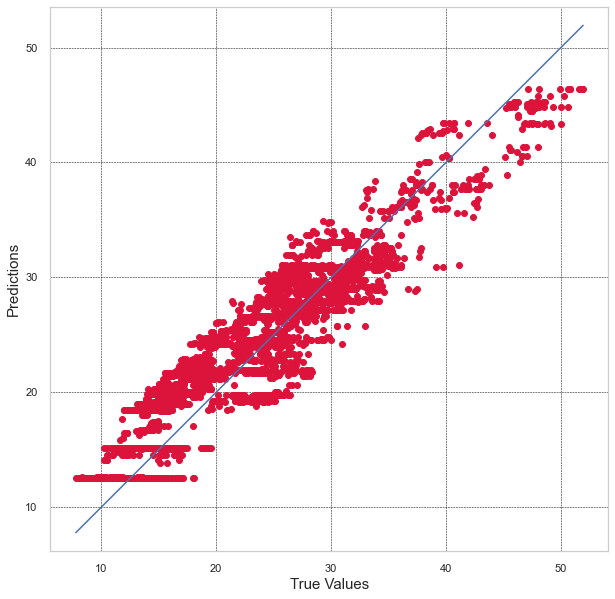

In [924]:
plt.figure(figsize=(10,10))
plt.scatter(y_test_reg,test_predict_abr, c='crimson')

y_test_reg,test_predict_reg
p1 = max(max(test_predict_abr), max(y_test_reg))
p2 = min(min(test_predict_abr), min(y_test_reg))
plt.plot([p1, p2], [p1, p2], 'b-')
ax = plt.axes()
ax.patch.set_facecolor('white')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [925]:
print("Regression Metrics - AdaBoost Regressor")
print("-------------------------------------------------------------------------------------")
print("Train data R2 score:", r2_score(y_train_reg,train_predict_abr))
print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train_reg,train_predict_abr)))
print("Train data MSE: ", mean_squared_error(y_train_reg,train_predict_abr))
print("Train data MAE: ", mean_absolute_error(y_train_reg,train_predict_abr))
print("-------------------------------------------------------------------------------------")
print("Test data R2 score:", r2_score(y_test_reg,test_predict_abr))
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test_reg,test_predict_abr)))
print("Test data MSE: ", mean_squared_error(y_test_reg,test_predict_abr))
print("Test data MAE: ", mean_absolute_error(y_test_reg,test_predict_abr))
print("-------------------------------------------------------------------------------------")

Regression Metrics - AdaBoost Regressor
-------------------------------------------------------------------------------------
Train data R2 score: 0.8567404784911639
Train data RMSE:  3.1970434282897506
Train data MSE:  10.221086682370682
Train data MAE:  2.7817376412253125
-------------------------------------------------------------------------------------
Test data R2 score: 0.8520649539394343
Test data RMSE:  3.237618893375428
Test data MSE:  10.482176098741533
Test data MAE:  2.8130063011107898
-------------------------------------------------------------------------------------


Ada boosting surprisingly did not lead to the expected outcome. And for the present context would be ranked below SVR. With RMSE, MSE and MAE on average being 24% larger on the training data, and being 20% larger on the test data, than that compared to SVR.